In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tqdm import tqdm
from PIL import Image
import io

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Average, Input, Concatenate, GlobalMaxPooling2D,BatchNormalization
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, DenseNet121, InceptionResNetV2, NASNetMobile
from keras.applications.xception import Xception
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, clear_output
import ipywidgets as widgets

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
labels = ['Ulcer', 'Healthy']
X_train = []
Y_train  = []
X_test = []
Y_test = []
image_size=224

for label in labels:
    trainPath = os.path.join('/content/drive/My Drive/DFU Dataset/train',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(label)
    
    testPath = os.path.join('/content/drive/My Drive/DFU Dataset/test',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image_size, image_size))
        X_test.append(image)
        Y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)

100%|██████████| 110/110 [00:03<00:00, 32.93it/s]


In [4]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=1010)
X_train.shape

(844, 224, 224, 3)

In [5]:
X_test, Y_test = shuffle(X_test, Y_test, random_state=1010)
X_test.shape

(211, 224, 224, 3)

In [6]:
y_train_ = []
for i in Y_train:
    y_train_.append(labels.index(i))
Y_train = y_train_

Y_train = tf.keras.utils.to_categorical(Y_train)

y_test_ = []
for i in Y_test:
    y_test_.append(labels.index(i))
Y_test = y_test_

Y_test = tf.keras.utils.to_categorical(Y_test)

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=1010)
X_val.shape

(85, 224, 224, 3)

In [8]:
import keras
import keras.utils
from keras import utils as np_utils
import numpy as np
from keras import layers
from keras.models import Model, load_model
import pydot
from keras.utils.vis_utils import plot_model
from matplotlib.pyplot import imshow
X_train.shape

(759, 224, 224, 3)

In [11]:
def modified_layers(x):
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x) 
    x = Dense(128,activation='relu')(x) 
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x) 
    return x

In [12]:
vgg16 = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False
x = modified_layers(vgg16.output)
prediction1 = Dense(2, activation='softmax')(x)
model_vgg16 = Model(inputs=vgg16.inputs, outputs=prediction1)
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
vgg19 = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = False
x = modified_layers(vgg19.output)
prediction1 = Dense(2, activation='softmax')(x)
model_vgg19 = Model(inputs=vgg19.inputs, outputs=prediction1)

80134624/80134624 [==============================] - 5s 0us/step


In [14]:
dense = DenseNet201(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in dense.layers:
    layer.trainable = False
x = modified_layers(dense.output)
prediction1 = Dense(2, activation='softmax')(x)
model_dense = Model(inputs=dense.inputs, outputs=prediction1)

74836368/74836368 [==============================] - 4s 0us/step


In [15]:
nas = NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in nas.layers:
    layer.trainable = False
x = modified_layers(nas.output)
prediction1 = Dense(2, activation='softmax')(x)
model_nas = Model(inputs=nas.inputs, outputs=prediction1)

19993432/19993432 [==============================] - 2s 0us/step


In [16]:
mob = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in mob.layers:
    layer.trainable = False
x = modified_layers(mob.output)
prediction1 = Dense(2, activation='softmax')(x)
model_mob = Model(inputs=mob.inputs, outputs=prediction1)

17225924/17225924 [==============================] - 2s 0us/step


In [17]:
input_shape = (image_size, image_size, 3)
inputs = Input(input_shape)
 
dense   = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)(inputs)
nas      = tf.keras.applications.NASNetMobile(weights='imagenet', include_top=False, input_shape=input_shape)(inputs)
vgg      = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)(inputs)

multi_net = Concatenate()([GlobalAveragePooling2D()(dense), GlobalAveragePooling2D()(nas), GlobalAveragePooling2D()(vgg)])
outputs = Dropout(0.4)(multi_net)
outputs = BatchNormalization()(outputs) 
outputs = Dense(128,activation='relu')(outputs) 
outputs = Dropout(0.2)(outputs)
outputs = BatchNormalization()(outputs) 
predicts = Dense(2, activation='softmax')(outputs)
multi = Model(inputs, predicts)

In [18]:
datagen = ImageDataGenerator(
zoom_range=2,  # set range for random zoom
rotation_range = 90,
shear_range = 0.4,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
vertical_flip=True)

datagen.fit(X_train)

In [19]:
model_vgg16.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_vgg16.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=50, 
                              callbacks=[learn_control, checkpoint])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-19-1b665b6b0b58>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_vgg16.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/50
24/23 [==============================] - ETA: 0s - loss: 0.9563 - accuracy: 0.4585

23/23 [==============================] - 29s 764ms/step - loss: 0.9563 - accuracy: 0.4585 - val_loss: 0.9394 - val_accuracy: 0.4118 - lr: 1.0000e-04
Epoch 2/50
24/23 [==============================] - ETA: 0s - loss: 0.7263 - accuracy: 0.6324

23/23 [==============================] - 9s 374ms/step - loss: 0.7263 - accuracy: 0.6324 - val_loss: 0.6356 - val_accuracy: 0.6941 - lr: 1.0000e-04
Epoch 3/50
24/23 [==============================] - ETA: 0s - loss: 0.6309 - accuracy: 0.7181

23/23 [==============================] - 10s 409ms/step - loss: 0.6309 - accuracy: 0.7181 - val_loss: 0.4956 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 4/50
24/23 [==============================] - ETA: 0s - loss: 0.5295 - accuracy: 0.7839

23/23 [==============================] - 10s 436ms/step - loss: 0.5295 - accuracy: 0.7839 - val_loss: 0.4021 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 5/50
24/23 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.7958

23/23 [==============================] - 10s 409ms/step - loss: 0.4890 - accuracy: 0.7958 - val_loss: 0.3389 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 6/50
24/23 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8300

23/23 [==============================] - 9s 364ms/step - loss: 0.4490 - accuracy: 0.8300 - val_loss: 0.2881 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 7/50
24/23 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.8458

23/23 [==============================] - 10s 434ms/step - loss: 0.4167 - accuracy: 0.8458 - val_loss: 0.2493 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 8/50
24/23 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.8432

23/23 [==============================] - 10s 402ms/step - loss: 0.4215 - accuracy: 0.8432 - val_loss: 0.2219 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 9/50
24/23 [==============================] - ETA: 0s - loss: 0.3804 - accuracy: 0.8379

23/23 [==============================] - 9s 364ms/step - loss: 0.3804 - accuracy: 0.8379 - val_loss: 0.2000 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 10/50
24/23 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8617

23/23 [==============================] - 10s 419ms/step - loss: 0.3752 - accuracy: 0.8617 - val_loss: 0.1878 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 11/50
24/23 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8709

23/23 [==============================] - 10s 420ms/step - loss: 0.3405 - accuracy: 0.8709 - val_loss: 0.1743 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 12/50
24/23 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8617

23/23 [==============================] - 9s 392ms/step - loss: 0.3524 - accuracy: 0.8617 - val_loss: 0.1645 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 13/50
24/23 [==============================] - ETA: 0s - loss: 0.3391 - accuracy: 0.8801

23/23 [==============================] - 10s 396ms/step - loss: 0.3391 - accuracy: 0.8801 - val_loss: 0.1542 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 14/50
24/23 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8814

23/23 [==============================] - 10s 433ms/step - loss: 0.3180 - accuracy: 0.8814 - val_loss: 0.1480 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 15/50
24/23 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.9157

23/23 [==============================] - 10s 417ms/step - loss: 0.2718 - accuracy: 0.9157 - val_loss: 0.1347 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 16/50
24/23 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8854

23/23 [==============================] - 9s 362ms/step - loss: 0.3073 - accuracy: 0.8854 - val_loss: 0.1279 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 17/50
24/23 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.8906

23/23 [==============================] - 9s 383ms/step - loss: 0.2963 - accuracy: 0.8906 - val_loss: 0.1239 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 18/50
24/23 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.8972

23/23 [==============================] - 10s 430ms/step - loss: 0.2826 - accuracy: 0.8972 - val_loss: 0.1205 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 19/50
24/23 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.8986

23/23 [==============================] - 10s 422ms/step - loss: 0.2739 - accuracy: 0.8986 - val_loss: 0.1158 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 20/50
24/23 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.8906

23/23 [==============================] - 9s 368ms/step - loss: 0.2836 - accuracy: 0.8906 - val_loss: 0.1100 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 21/50
24/23 [==============================] - ETA: 0s - loss: 0.2846 - accuracy: 0.8920

23/23 [==============================] - 10s 433ms/step - loss: 0.2846 - accuracy: 0.8920 - val_loss: 0.1089 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 22/50
24/23 [==============================] - ETA: 0s - loss: 0.2743 - accuracy: 0.9025

23/23 [==============================] - 10s 421ms/step - loss: 0.2743 - accuracy: 0.9025 - val_loss: 0.1086 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 23/50
24/23 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.9051

23/23 [==============================] - 9s 365ms/step - loss: 0.2739 - accuracy: 0.9051 - val_loss: 0.1044 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 24/50
24/23 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9051

23/23 [==============================] - 10s 391ms/step - loss: 0.2572 - accuracy: 0.9051 - val_loss: 0.0999 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 25/50
24/23 [==============================] - ETA: 0s - loss: 0.2647 - accuracy: 0.8999

23/23 [==============================] - 10s 429ms/step - loss: 0.2647 - accuracy: 0.8999 - val_loss: 0.0961 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 26/50
24/23 [==============================] - ETA: 0s - loss: 0.2343 - accuracy: 0.9275

23/23 [==============================] - 10s 418ms/step - loss: 0.2343 - accuracy: 0.9275 - val_loss: 0.0973 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 27/50
24/23 [==============================] - ETA: 0s - loss: 0.2229 - accuracy: 0.9249

23/23 [==============================] - 9s 379ms/step - loss: 0.2229 - accuracy: 0.9249 - val_loss: 0.0945 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 28/50
24/23 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9170

23/23 [==============================] - 10s 418ms/step - loss: 0.2269 - accuracy: 0.9170 - val_loss: 0.0935 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 29/50
24/23 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9157

23/23 [==============================] - 10s 436ms/step - loss: 0.2363 - accuracy: 0.9157 - val_loss: 0.0954 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 30/50
24/23 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9012

23/23 [==============================] - 10s 411ms/step - loss: 0.2567 - accuracy: 0.9012 - val_loss: 0.0948 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 31/50
24/23 [==============================] - ETA: 0s - loss: 0.2118 - accuracy: 0.9183

23/23 [==============================] - 9s 362ms/step - loss: 0.2118 - accuracy: 0.9183 - val_loss: 0.0916 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 32/50
24/23 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9104

23/23 [==============================] - 10s 417ms/step - loss: 0.2606 - accuracy: 0.9104 - val_loss: 0.0873 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 33/50
24/23 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9130

23/23 [==============================] - 10s 418ms/step - loss: 0.2184 - accuracy: 0.9130 - val_loss: 0.0899 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 34/50
24/23 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9091

23/23 [==============================] - 9s 382ms/step - loss: 0.2261 - accuracy: 0.9091 - val_loss: 0.0892 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 35/50
24/23 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.9157

23/23 [==============================] - 9s 360ms/step - loss: 0.2280 - accuracy: 0.9157 - val_loss: 0.0847 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 36/50
24/23 [==============================] - ETA: 0s - loss: 0.2151 - accuracy: 0.9289

23/23 [==============================] - 10s 418ms/step - loss: 0.2151 - accuracy: 0.9289 - val_loss: 0.0851 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 37/50
24/23 [==============================] - ETA: 0s - loss: 0.2358 - accuracy: 0.9117

23/23 [==============================] - 10s 437ms/step - loss: 0.2358 - accuracy: 0.9117 - val_loss: 0.0839 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 38/50
24/23 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.9236

23/23 [==============================] - 9s 378ms/step - loss: 0.2053 - accuracy: 0.9236 - val_loss: 0.0785 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 39/50
24/23 [==============================] - ETA: 0s - loss: 0.1996 - accuracy: 0.9223

23/23 [==============================] - 9s 363ms/step - loss: 0.1996 - accuracy: 0.9223 - val_loss: 0.0767 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 40/50
24/23 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9078

23/23 [==============================] - 10s 416ms/step - loss: 0.2170 - accuracy: 0.9078 - val_loss: 0.0795 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 41/50
24/23 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.8999

23/23 [==============================] - 10s 419ms/step - loss: 0.2373 - accuracy: 0.8999 - val_loss: 0.0782 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 42/50
24/23 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9170

23/23 [==============================] - 9s 366ms/step - loss: 0.2049 - accuracy: 0.9170 - val_loss: 0.0786 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 43/50
24/23 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9144

23/23 [==============================] - 10s 425ms/step - loss: 0.2230 - accuracy: 0.9144 - val_loss: 0.0767 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 44/50
24/23 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.9091

23/23 [==============================] - 10s 420ms/step - loss: 0.2464 - accuracy: 0.9091 - val_loss: 0.0782 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 45/50
24/23 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.9196

23/23 [==============================] - 10s 415ms/step - loss: 0.2019 - accuracy: 0.9196 - val_loss: 0.0827 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 46/50
24/23 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9196

23/23 [==============================] - 9s 362ms/step - loss: 0.2261 - accuracy: 0.9196 - val_loss: 0.0842 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 47/50
24/23 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9236

23/23 [==============================] - 10s 432ms/step - loss: 0.1973 - accuracy: 0.9236 - val_loss: 0.0799 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 48/50
24/23 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9209

23/23 [==============================] - 10s 417ms/step - loss: 0.2249 - accuracy: 0.9209 - val_loss: 0.0804 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 49/50
24/23 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9157

23/23 [==============================] - 9s 373ms/step - loss: 0.2145 - accuracy: 0.9157 - val_loss: 0.0794 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 50/50
24/23 [==============================] - ETA: 0s - loss: 0.2041 - accuracy: 0.9170

23/23 [==============================] - 10s 443ms/step - loss: 0.2041 - accuracy: 0.9170 - val_loss: 0.0776 - val_accuracy: 0.9882 - lr: 1.0000e-04


In [20]:
model_vgg19.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_vgg19.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=50, 
                              callbacks=[learn_control, checkpoint])

<ipython-input-20-587224e262a4>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_vgg19.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/50
24/23 [==============================] - ETA: 0s - loss: 0.7631 - accuracy: 0.6074

23/23 [==============================] - 12s 447ms/step - loss: 0.7631 - accuracy: 0.6074 - val_loss: 0.5657 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 2/50
24/23 [==============================] - ETA: 0s - loss: 0.6214 - accuracy: 0.7233

23/23 [==============================] - 10s 413ms/step - loss: 0.6214 - accuracy: 0.7233 - val_loss: 0.4360 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 3/50
24/23 [==============================] - ETA: 0s - loss: 0.5516 - accuracy: 0.7734

23/23 [==============================] - 13s 527ms/step - loss: 0.5516 - accuracy: 0.7734 - val_loss: 0.3775 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 4/50
24/23 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.7655

23/23 [==============================] - 10s 435ms/step - loss: 0.5303 - accuracy: 0.7655 - val_loss: 0.3248 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 5/50
24/23 [==============================] - ETA: 0s - loss: 0.4556 - accuracy: 0.8103

23/23 [==============================] - 9s 387ms/step - loss: 0.4556 - accuracy: 0.8103 - val_loss: 0.2808 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 6/50
24/23 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.8327

23/23 [==============================] - 10s 410ms/step - loss: 0.4367 - accuracy: 0.8327 - val_loss: 0.2469 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 7/50
24/23 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8116

23/23 [==============================] - 11s 483ms/step - loss: 0.4478 - accuracy: 0.8116 - val_loss: 0.2206 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 8/50
24/23 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8406

23/23 [==============================] - 10s 432ms/step - loss: 0.4023 - accuracy: 0.8406 - val_loss: 0.2019 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 9/50
24/23 [==============================] - ETA: 0s - loss: 0.3888 - accuracy: 0.8498

23/23 [==============================] - 9s 393ms/step - loss: 0.3888 - accuracy: 0.8498 - val_loss: 0.1839 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 10/50
24/23 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8524

23/23 [==============================] - 10s 407ms/step - loss: 0.3828 - accuracy: 0.8524 - val_loss: 0.1700 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 11/50
24/23 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.8617

23/23 [==============================] - 12s 507ms/step - loss: 0.3750 - accuracy: 0.8617 - val_loss: 0.1552 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 12/50
24/23 [==============================] - ETA: 0s - loss: 0.3460 - accuracy: 0.8682

23/23 [==============================] - 10s 403ms/step - loss: 0.3460 - accuracy: 0.8682 - val_loss: 0.1445 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 13/50
24/23 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.8709

23/23 [==============================] - 10s 397ms/step - loss: 0.3244 - accuracy: 0.8709 - val_loss: 0.1362 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 14/50
24/23 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.8841

23/23 [==============================] - 11s 447ms/step - loss: 0.3164 - accuracy: 0.8841 - val_loss: 0.1266 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 15/50
24/23 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.8986

23/23 [==============================] - 10s 437ms/step - loss: 0.2891 - accuracy: 0.8986 - val_loss: 0.1208 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 16/50
24/23 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.8775

23/23 [==============================] - 9s 378ms/step - loss: 0.3038 - accuracy: 0.8775 - val_loss: 0.1155 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 17/50
24/23 [==============================] - ETA: 0s - loss: 0.2817 - accuracy: 0.9078

23/23 [==============================] - 10s 424ms/step - loss: 0.2817 - accuracy: 0.9078 - val_loss: 0.1114 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 18/50
24/23 [==============================] - ETA: 0s - loss: 0.2527 - accuracy: 0.9262

23/23 [==============================] - 10s 440ms/step - loss: 0.2527 - accuracy: 0.9262 - val_loss: 0.1053 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 19/50
24/23 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.8959

23/23 [==============================] - 9s 395ms/step - loss: 0.2718 - accuracy: 0.8959 - val_loss: 0.1032 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 20/50
24/23 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.8946

23/23 [==============================] - 10s 405ms/step - loss: 0.2629 - accuracy: 0.8946 - val_loss: 0.1000 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 21/50
24/23 [==============================] - ETA: 0s - loss: 0.2789 - accuracy: 0.8946

23/23 [==============================] - 10s 437ms/step - loss: 0.2789 - accuracy: 0.8946 - val_loss: 0.0982 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 22/50
24/23 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.8920

23/23 [==============================] - 10s 435ms/step - loss: 0.2839 - accuracy: 0.8920 - val_loss: 0.0984 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 23/50
24/23 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.8906

23/23 [==============================] - 9s 377ms/step - loss: 0.2860 - accuracy: 0.8906 - val_loss: 0.0996 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 24/50
24/23 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.8906

23/23 [==============================] - 10s 415ms/step - loss: 0.2975 - accuracy: 0.8906 - val_loss: 0.0960 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 25/50
24/23 [==============================] - ETA: 0s - loss: 0.2259 - accuracy: 0.9236

23/23 [==============================] - 10s 435ms/step - loss: 0.2259 - accuracy: 0.9236 - val_loss: 0.0913 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 26/50
24/23 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9025

23/23 [==============================] - 10s 444ms/step - loss: 0.2549 - accuracy: 0.9025 - val_loss: 0.0859 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 27/50
24/23 [==============================] - ETA: 0s - loss: 0.2343 - accuracy: 0.9065

23/23 [==============================] - 9s 378ms/step - loss: 0.2343 - accuracy: 0.9065 - val_loss: 0.0833 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 28/50
24/23 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9209

23/23 [==============================] - 11s 450ms/step - loss: 0.2274 - accuracy: 0.9209 - val_loss: 0.0829 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 29/50
24/23 [==============================] - ETA: 0s - loss: 0.2552 - accuracy: 0.8999

23/23 [==============================] - 10s 431ms/step - loss: 0.2552 - accuracy: 0.8999 - val_loss: 0.0816 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 30/50
24/23 [==============================] - ETA: 0s - loss: 0.2340 - accuracy: 0.9249

23/23 [==============================] - 10s 414ms/step - loss: 0.2340 - accuracy: 0.9249 - val_loss: 0.0807 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 31/50
24/23 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.9209

23/23 [==============================] - 9s 383ms/step - loss: 0.2293 - accuracy: 0.9209 - val_loss: 0.0776 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 32/50
24/23 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9196

23/23 [==============================] - 10s 428ms/step - loss: 0.2124 - accuracy: 0.9196 - val_loss: 0.0781 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 33/50
24/23 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.9302

23/23 [==============================] - 10s 438ms/step - loss: 0.2032 - accuracy: 0.9302 - val_loss: 0.0755 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 34/50
24/23 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9065

23/23 [==============================] - 10s 414ms/step - loss: 0.2347 - accuracy: 0.9065 - val_loss: 0.0771 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 35/50
24/23 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.9196

23/23 [==============================] - 9s 384ms/step - loss: 0.2064 - accuracy: 0.9196 - val_loss: 0.0741 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 36/50
24/23 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9144

23/23 [==============================] - 10s 446ms/step - loss: 0.2272 - accuracy: 0.9144 - val_loss: 0.0769 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 37/50
24/23 [==============================] - ETA: 0s - loss: 0.2063 - accuracy: 0.9302

23/23 [==============================] - 10s 415ms/step - loss: 0.2063 - accuracy: 0.9302 - val_loss: 0.0771 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 38/50
24/23 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9196

23/23 [==============================] - 9s 383ms/step - loss: 0.2107 - accuracy: 0.9196 - val_loss: 0.0780 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 39/50
24/23 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.9078

23/23 [==============================] - 10s 440ms/step - loss: 0.2373 - accuracy: 0.9078 - val_loss: 0.0807 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 40/50
24/23 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9315

23/23 [==============================] - 10s 439ms/step - loss: 0.1961 - accuracy: 0.9315 - val_loss: 0.0820 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 41/50
24/23 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9144

23/23 [==============================] - 10s 420ms/step - loss: 0.2051 - accuracy: 0.9144 - val_loss: 0.0802 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 42/50
24/23 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9183

23/23 [==============================] - 9s 387ms/step - loss: 0.1995 - accuracy: 0.9183 - val_loss: 0.0797 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 43/50
24/23 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9196

23/23 [==============================] - 10s 434ms/step - loss: 0.2222 - accuracy: 0.9196 - val_loss: 0.0809 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 44/50
24/23 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9012

23/23 [==============================] - 10s 430ms/step - loss: 0.2360 - accuracy: 0.9012 - val_loss: 0.0825 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 45/50
24/23 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9262

23/23 [==============================] - 10s 406ms/step - loss: 0.2062 - accuracy: 0.9262 - val_loss: 0.0814 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 46/50
24/23 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9275

23/23 [==============================] - 10s 401ms/step - loss: 0.2049 - accuracy: 0.9275 - val_loss: 0.0845 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 47/50
24/23 [==============================] - ETA: 0s - loss: 0.1875 - accuracy: 0.9315

23/23 [==============================] - 10s 440ms/step - loss: 0.1875 - accuracy: 0.9315 - val_loss: 0.0819 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 48/50
24/23 [==============================] - ETA: 0s - loss: 0.2331 - accuracy: 0.9051

23/23 [==============================] - 10s 411ms/step - loss: 0.2331 - accuracy: 0.9051 - val_loss: 0.0786 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 49/50
24/23 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9289

23/23 [==============================] - 9s 378ms/step - loss: 0.2082 - accuracy: 0.9289 - val_loss: 0.0794 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 50/50
24/23 [==============================] - ETA: 0s - loss: 0.2251 - accuracy: 0.9117

23/23 [==============================] - 10s 427ms/step - loss: 0.2251 - accuracy: 0.9117 - val_loss: 0.0850 - val_accuracy: 0.9765 - lr: 1.0000e-04


In [21]:
model_nas.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_nas.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=50, 
                              callbacks=[learn_control, checkpoint])

<ipython-input-21-7f38b126b8a4>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_nas.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/50
24/23 [==============================] - ETA: 0s - loss: 0.9856 - accuracy: 0.4480

23/23 [==============================] - 28s 619ms/step - loss: 0.9856 - accuracy: 0.4480 - val_loss: 0.7913 - val_accuracy: 0.4706 - lr: 1.0000e-04
Epoch 2/50
24/23 [==============================] - ETA: 0s - loss: 0.8816 - accuracy: 0.5178

23/23 [==============================] - 8s 348ms/step - loss: 0.8816 - accuracy: 0.5178 - val_loss: 0.7109 - val_accuracy: 0.5529 - lr: 1.0000e-04
Epoch 3/50
24/23 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.6179

23/23 [==============================] - 10s 417ms/step - loss: 0.7609 - accuracy: 0.6179 - val_loss: 0.6549 - val_accuracy: 0.7176 - lr: 1.0000e-04
Epoch 4/50
24/23 [==============================] - ETA: 0s - loss: 0.7202 - accuracy: 0.6482

23/23 [==============================] - 10s 410ms/step - loss: 0.7202 - accuracy: 0.6482 - val_loss: 0.6088 - val_accuracy: 0.7765 - lr: 1.0000e-04
Epoch 5/50
24/23 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.6825

23/23 [==============================] - 8s 353ms/step - loss: 0.6675 - accuracy: 0.6825 - val_loss: 0.5722 - val_accuracy: 0.7882 - lr: 1.0000e-04
Epoch 6/50
24/23 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.7088

23/23 [==============================] - 10s 414ms/step - loss: 0.6429 - accuracy: 0.7088 - val_loss: 0.5409 - val_accuracy: 0.7882 - lr: 1.0000e-04
Epoch 7/50
24/23 [==============================] - ETA: 0s - loss: 0.6146 - accuracy: 0.7352

23/23 [==============================] - 10s 414ms/step - loss: 0.6146 - accuracy: 0.7352 - val_loss: 0.5144 - val_accuracy: 0.7765 - lr: 1.0000e-04
Epoch 8/50
24/23 [==============================] - ETA: 0s - loss: 0.5879 - accuracy: 0.7563

23/23 [==============================] - 9s 359ms/step - loss: 0.5879 - accuracy: 0.7563 - val_loss: 0.4930 - val_accuracy: 0.8118 - lr: 1.0000e-04
Epoch 9/50
24/23 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.7655

23/23 [==============================] - 9s 398ms/step - loss: 0.5579 - accuracy: 0.7655 - val_loss: 0.4749 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 10/50
24/23 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.7549

23/23 [==============================] - 10s 418ms/step - loss: 0.5653 - accuracy: 0.7549 - val_loss: 0.4569 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 11/50
24/23 [==============================] - ETA: 0s - loss: 0.5455 - accuracy: 0.7431

23/23 [==============================] - 10s 415ms/step - loss: 0.5455 - accuracy: 0.7431 - val_loss: 0.4405 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 12/50
24/23 [==============================] - ETA: 0s - loss: 0.5367 - accuracy: 0.7813

23/23 [==============================] - 8s 355ms/step - loss: 0.5367 - accuracy: 0.7813 - val_loss: 0.4275 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 13/50
24/23 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7497

23/23 [==============================] - 9s 376ms/step - loss: 0.5766 - accuracy: 0.7497 - val_loss: 0.4172 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 14/50
24/23 [==============================] - ETA: 0s - loss: 0.5241 - accuracy: 0.7839

23/23 [==============================] - 10s 413ms/step - loss: 0.5241 - accuracy: 0.7839 - val_loss: 0.4092 - val_accuracy: 0.8353 - lr: 1.0000e-04
Epoch 15/50
24/23 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.7800

23/23 [==============================] - 9s 394ms/step - loss: 0.5007 - accuracy: 0.7800 - val_loss: 0.3982 - val_accuracy: 0.8353 - lr: 1.0000e-04
Epoch 16/50
24/23 [==============================] - ETA: 0s - loss: 0.5059 - accuracy: 0.7945

23/23 [==============================] - 8s 351ms/step - loss: 0.5059 - accuracy: 0.7945 - val_loss: 0.3847 - val_accuracy: 0.8353 - lr: 1.0000e-04
Epoch 17/50
24/23 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.7787

23/23 [==============================] - 10s 416ms/step - loss: 0.5172 - accuracy: 0.7787 - val_loss: 0.3738 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 18/50
24/23 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.7708

23/23 [==============================] - 10s 414ms/step - loss: 0.5123 - accuracy: 0.7708 - val_loss: 0.3612 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 19/50
24/23 [==============================] - ETA: 0s - loss: 0.5125 - accuracy: 0.7800

23/23 [==============================] - 9s 358ms/step - loss: 0.5125 - accuracy: 0.7800 - val_loss: 0.3549 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 20/50
24/23 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.8037

23/23 [==============================] - 10s 399ms/step - loss: 0.4827 - accuracy: 0.8037 - val_loss: 0.3467 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 21/50
24/23 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.7734

23/23 [==============================] - 10s 411ms/step - loss: 0.5060 - accuracy: 0.7734 - val_loss: 0.3435 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 22/50
24/23 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.7971

23/23 [==============================] - 9s 379ms/step - loss: 0.4758 - accuracy: 0.7971 - val_loss: 0.3380 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 23/50
24/23 [==============================] - ETA: 0s - loss: 0.4982 - accuracy: 0.7905

23/23 [==============================] - 9s 371ms/step - loss: 0.4982 - accuracy: 0.7905 - val_loss: 0.3347 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 24/50
24/23 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.8011

23/23 [==============================] - 10s 410ms/step - loss: 0.4835 - accuracy: 0.8011 - val_loss: 0.3285 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 25/50
24/23 [==============================] - ETA: 0s - loss: 0.5049 - accuracy: 0.7708

23/23 [==============================] - 10s 403ms/step - loss: 0.5049 - accuracy: 0.7708 - val_loss: 0.3317 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 26/50
24/23 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.8024

23/23 [==============================] - 8s 348ms/step - loss: 0.4613 - accuracy: 0.8024 - val_loss: 0.3311 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 27/50
24/23 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.7681

23/23 [==============================] - 10s 409ms/step - loss: 0.4911 - accuracy: 0.7681 - val_loss: 0.3309 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 28/50
24/23 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.7958

23/23 [==============================] - 10s 413ms/step - loss: 0.4751 - accuracy: 0.7958 - val_loss: 0.3292 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 29/50
24/23 [==============================] - ETA: 0s - loss: 0.4816 - accuracy: 0.7839

23/23 [==============================] - 8s 353ms/step - loss: 0.4816 - accuracy: 0.7839 - val_loss: 0.3335 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 30/50
24/23 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.7852

23/23 [==============================] - 10s 412ms/step - loss: 0.4609 - accuracy: 0.7852 - val_loss: 0.3256 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 31/50
24/23 [==============================] - ETA: 0s - loss: 0.4433 - accuracy: 0.8155

23/23 [==============================] - 10s 411ms/step - loss: 0.4433 - accuracy: 0.8155 - val_loss: 0.3238 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 32/50
24/23 [==============================] - ETA: 0s - loss: 0.4889 - accuracy: 0.8063

23/23 [==============================] - 8s 353ms/step - loss: 0.4889 - accuracy: 0.8063 - val_loss: 0.3238 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 33/50
24/23 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.8142

23/23 [==============================] - 8s 350ms/step - loss: 0.4559 - accuracy: 0.8142 - val_loss: 0.3198 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 34/50
24/23 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.7826

23/23 [==============================] - 10s 402ms/step - loss: 0.4977 - accuracy: 0.7826 - val_loss: 0.3124 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 35/50
24/23 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.8103

23/23 [==============================] - 10s 414ms/step - loss: 0.4581 - accuracy: 0.8103 - val_loss: 0.3125 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 36/50
24/23 [==============================] - ETA: 0s - loss: 0.4629 - accuracy: 0.8103

23/23 [==============================] - 8s 345ms/step - loss: 0.4629 - accuracy: 0.8103 - val_loss: 0.3070 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 37/50
24/23 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.7971

23/23 [==============================] - 9s 379ms/step - loss: 0.4642 - accuracy: 0.7971 - val_loss: 0.3051 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 38/50
24/23 [==============================] - ETA: 0s - loss: 0.4863 - accuracy: 0.7918

23/23 [==============================] - 10s 408ms/step - loss: 0.4863 - accuracy: 0.7918 - val_loss: 0.3025 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 39/50
24/23 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.7826

23/23 [==============================] - 9s 393ms/step - loss: 0.4874 - accuracy: 0.7826 - val_loss: 0.3086 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 40/50
24/23 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.7879

23/23 [==============================] - 9s 354ms/step - loss: 0.4801 - accuracy: 0.7879 - val_loss: 0.3096 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 41/50
24/23 [==============================] - ETA: 0s - loss: 0.4198 - accuracy: 0.8182

23/23 [==============================] - 10s 417ms/step - loss: 0.4198 - accuracy: 0.8182 - val_loss: 0.3055 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 42/50
24/23 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8129

23/23 [==============================] - 10s 412ms/step - loss: 0.4745 - accuracy: 0.8129 - val_loss: 0.3102 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 43/50
24/23 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.8155

23/23 [==============================] - 9s 369ms/step - loss: 0.4576 - accuracy: 0.8155 - val_loss: 0.3067 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 44/50
24/23 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.7997

23/23 [==============================] - 9s 387ms/step - loss: 0.4700 - accuracy: 0.7997 - val_loss: 0.3003 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 45/50
24/23 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.8050

23/23 [==============================] - 10s 408ms/step - loss: 0.4741 - accuracy: 0.8050 - val_loss: 0.2963 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 46/50
24/23 [==============================] - ETA: 0s - loss: 0.4365 - accuracy: 0.8142

23/23 [==============================] - 10s 413ms/step - loss: 0.4365 - accuracy: 0.8142 - val_loss: 0.2909 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 47/50
24/23 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8208

23/23 [==============================] - 8s 349ms/step - loss: 0.4490 - accuracy: 0.8208 - val_loss: 0.2861 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 48/50
24/23 [==============================] - ETA: 0s - loss: 0.4461 - accuracy: 0.8090

23/23 [==============================] - 9s 368ms/step - loss: 0.4461 - accuracy: 0.8090 - val_loss: 0.2880 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 49/50
24/23 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.8116

23/23 [==============================] - 10s 417ms/step - loss: 0.4684 - accuracy: 0.8116 - val_loss: 0.2880 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 50/50
24/23 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.8129

23/23 [==============================] - 10s 419ms/step - loss: 0.4643 - accuracy: 0.8129 - val_loss: 0.2862 - val_accuracy: 0.8588 - lr: 1.0000e-04


In [22]:
model_mob.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_mob.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=30, 
                              callbacks=[learn_control, checkpoint])

<ipython-input-22-1e661c77f1db>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_mob.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/30
24/23 [==============================] - ETA: 0s - loss: 0.7357 - accuracy: 0.6192

23/23 [==============================] - 12s 356ms/step - loss: 0.7357 - accuracy: 0.6192 - val_loss: 0.6016 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 2/30
24/23 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.7497

23/23 [==============================] - 9s 385ms/step - loss: 0.5763 - accuracy: 0.7497 - val_loss: 0.4715 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 3/30
24/23 [==============================] - ETA: 0s - loss: 0.5623 - accuracy: 0.7628

23/23 [==============================] - 9s 373ms/step - loss: 0.5623 - accuracy: 0.7628 - val_loss: 0.4180 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 4/30
24/23 [==============================] - ETA: 0s - loss: 0.5328 - accuracy: 0.7866

23/23 [==============================] - 8s 324ms/step - loss: 0.5328 - accuracy: 0.7866 - val_loss: 0.3872 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 5/30
24/23 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.7997

23/23 [==============================] - 9s 384ms/step - loss: 0.5034 - accuracy: 0.7997 - val_loss: 0.3713 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 6/30
24/23 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.7839

23/23 [==============================] - 8s 346ms/step - loss: 0.5155 - accuracy: 0.7839 - val_loss: 0.3627 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 7/30
24/23 [==============================] - ETA: 0s - loss: 0.5147 - accuracy: 0.7852

23/23 [==============================] - 9s 359ms/step - loss: 0.5147 - accuracy: 0.7852 - val_loss: 0.3572 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 8/30
24/23 [==============================] - ETA: 0s - loss: 0.4981 - accuracy: 0.8142

23/23 [==============================] - 9s 388ms/step - loss: 0.4981 - accuracy: 0.8142 - val_loss: 0.3519 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 9/30
24/23 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7866

23/23 [==============================] - 8s 329ms/step - loss: 0.4987 - accuracy: 0.7866 - val_loss: 0.3463 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 10/30
24/23 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.8142

23/23 [==============================] - 8s 325ms/step - loss: 0.4633 - accuracy: 0.8142 - val_loss: 0.3406 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 11/30
24/23 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.8221

23/23 [==============================] - 9s 365ms/step - loss: 0.4492 - accuracy: 0.8221 - val_loss: 0.3317 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 12/30
24/23 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.8037

23/23 [==============================] - 9s 385ms/step - loss: 0.4688 - accuracy: 0.8037 - val_loss: 0.3272 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 13/30
24/23 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.8050

23/23 [==============================] - 11s 473ms/step - loss: 0.4837 - accuracy: 0.8050 - val_loss: 0.3261 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 14/30
24/23 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.8090

23/23 [==============================] - 8s 324ms/step - loss: 0.4403 - accuracy: 0.8090 - val_loss: 0.3237 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 15/30
24/23 [==============================] - ETA: 0s - loss: 0.4695 - accuracy: 0.7918

23/23 [==============================] - 9s 387ms/step - loss: 0.4695 - accuracy: 0.7918 - val_loss: 0.3248 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 16/30
24/23 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.8090

23/23 [==============================] - 8s 352ms/step - loss: 0.4567 - accuracy: 0.8090 - val_loss: 0.3236 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 17/30
24/23 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.7918

23/23 [==============================] - 9s 365ms/step - loss: 0.5028 - accuracy: 0.7918 - val_loss: 0.3252 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 18/30
24/23 [==============================] - ETA: 0s - loss: 0.4533 - accuracy: 0.8037

23/23 [==============================] - 9s 382ms/step - loss: 0.4533 - accuracy: 0.8037 - val_loss: 0.3211 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 19/30
24/23 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8287

23/23 [==============================] - 9s 385ms/step - loss: 0.4309 - accuracy: 0.8287 - val_loss: 0.3186 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 20/30
24/23 [==============================] - ETA: 0s - loss: 0.4229 - accuracy: 0.8195

23/23 [==============================] - 8s 330ms/step - loss: 0.4229 - accuracy: 0.8195 - val_loss: 0.3156 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 21/30
24/23 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.8090

23/23 [==============================] - 9s 388ms/step - loss: 0.4563 - accuracy: 0.8090 - val_loss: 0.3139 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 22/30
24/23 [==============================] - ETA: 0s - loss: 0.4107 - accuracy: 0.8235

23/23 [==============================] - 9s 388ms/step - loss: 0.4107 - accuracy: 0.8235 - val_loss: 0.3106 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 23/30
24/23 [==============================] - ETA: 0s - loss: 0.3940 - accuracy: 0.8274

23/23 [==============================] - 8s 327ms/step - loss: 0.3940 - accuracy: 0.8274 - val_loss: 0.3075 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 24/30
24/23 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.8327

23/23 [==============================] - 9s 387ms/step - loss: 0.4190 - accuracy: 0.8327 - val_loss: 0.3075 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 25/30
24/23 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.8050

23/23 [==============================] - 9s 372ms/step - loss: 0.4514 - accuracy: 0.8050 - val_loss: 0.3068 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 26/30
24/23 [==============================] - ETA: 0s - loss: 0.4155 - accuracy: 0.8287

23/23 [==============================] - 8s 333ms/step - loss: 0.4155 - accuracy: 0.8287 - val_loss: 0.3053 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 27/30
24/23 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8340

23/23 [==============================] - 9s 386ms/step - loss: 0.4253 - accuracy: 0.8340 - val_loss: 0.3041 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 28/30
24/23 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.8155

23/23 [==============================] - 9s 386ms/step - loss: 0.4266 - accuracy: 0.8155 - val_loss: 0.3045 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 29/30
24/23 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8340

23/23 [==============================] - 8s 322ms/step - loss: 0.4096 - accuracy: 0.8340 - val_loss: 0.3033 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 30/30
24/23 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8090

23/23 [==============================] - 9s 388ms/step - loss: 0.4075 - accuracy: 0.8090 - val_loss: 0.3023 - val_accuracy: 0.8824 - lr: 1.0000e-04


In [23]:
model_dense.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_dense.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=50, 
                              callbacks=[learn_control, checkpoint])

<ipython-input-23-09332928360d>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_dense.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/50
24/23 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.6574

23/23 [==============================] - 33s 808ms/step - loss: 0.6956 - accuracy: 0.6574 - val_loss: 0.5833 - val_accuracy: 0.7412 - lr: 1.0000e-04
Epoch 2/50
24/23 [==============================] - ETA: 0s - loss: 0.5042 - accuracy: 0.7984

23/23 [==============================] - 10s 429ms/step - loss: 0.5042 - accuracy: 0.7984 - val_loss: 0.5008 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 3/50
24/23 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8432

23/23 [==============================] - 10s 407ms/step - loss: 0.4265 - accuracy: 0.8432 - val_loss: 0.4584 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 4/50
24/23 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.8682

23/23 [==============================] - 9s 391ms/step - loss: 0.3868 - accuracy: 0.8682 - val_loss: 0.4113 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 5/50
24/23 [==============================] - ETA: 0s - loss: 0.3538 - accuracy: 0.8801

23/23 [==============================] - 10s 436ms/step - loss: 0.3538 - accuracy: 0.8801 - val_loss: 0.3697 - val_accuracy: 0.9059 - lr: 1.0000e-04
Epoch 6/50
24/23 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.8801

23/23 [==============================] - 10s 441ms/step - loss: 0.3433 - accuracy: 0.8801 - val_loss: 0.3303 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 7/50
24/23 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.8827

23/23 [==============================] - 10s 409ms/step - loss: 0.3138 - accuracy: 0.8827 - val_loss: 0.3047 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 8/50
24/23 [==============================] - ETA: 0s - loss: 0.2599 - accuracy: 0.9130

23/23 [==============================] - 9s 385ms/step - loss: 0.2599 - accuracy: 0.9130 - val_loss: 0.2775 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 9/50
24/23 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.8959

23/23 [==============================] - 10s 442ms/step - loss: 0.2839 - accuracy: 0.8959 - val_loss: 0.2544 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 10/50
24/23 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9144

23/23 [==============================] - 10s 433ms/step - loss: 0.2571 - accuracy: 0.9144 - val_loss: 0.2377 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 11/50
24/23 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8893

23/23 [==============================] - 10s 428ms/step - loss: 0.3111 - accuracy: 0.8893 - val_loss: 0.2203 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 12/50
24/23 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.8959

23/23 [==============================] - 10s 394ms/step - loss: 0.2816 - accuracy: 0.8959 - val_loss: 0.2096 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 13/50
24/23 [==============================] - ETA: 0s - loss: 0.2766 - accuracy: 0.8893

23/23 [==============================] - 11s 444ms/step - loss: 0.2766 - accuracy: 0.8893 - val_loss: 0.1948 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 14/50
24/23 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.8986

23/23 [==============================] - 10s 432ms/step - loss: 0.2865 - accuracy: 0.8986 - val_loss: 0.1846 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 15/50
24/23 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9170

23/23 [==============================] - 9s 385ms/step - loss: 0.2607 - accuracy: 0.9170 - val_loss: 0.1755 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 16/50
24/23 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.9078

23/23 [==============================] - 10s 418ms/step - loss: 0.2612 - accuracy: 0.9078 - val_loss: 0.1652 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 17/50
24/23 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9078

23/23 [==============================] - 10s 438ms/step - loss: 0.2517 - accuracy: 0.9078 - val_loss: 0.1564 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 18/50
24/23 [==============================] - ETA: 0s - loss: 0.2545 - accuracy: 0.9091

23/23 [==============================] - 10s 415ms/step - loss: 0.2545 - accuracy: 0.9091 - val_loss: 0.1504 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 19/50
24/23 [==============================] - ETA: 0s - loss: 0.2299 - accuracy: 0.9157

23/23 [==============================] - 9s 381ms/step - loss: 0.2299 - accuracy: 0.9157 - val_loss: 0.1447 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 20/50
24/23 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9223

23/23 [==============================] - 11s 448ms/step - loss: 0.2156 - accuracy: 0.9223 - val_loss: 0.1433 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 21/50
24/23 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9038

23/23 [==============================] - 11s 441ms/step - loss: 0.2567 - accuracy: 0.9038 - val_loss: 0.1441 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 22/50
24/23 [==============================] - ETA: 0s - loss: 0.2553 - accuracy: 0.9038

23/23 [==============================] - 10s 397ms/step - loss: 0.2553 - accuracy: 0.9038 - val_loss: 0.1410 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 23/50
24/23 [==============================] - ETA: 0s - loss: 0.2493 - accuracy: 0.9130

23/23 [==============================] - 11s 446ms/step - loss: 0.2493 - accuracy: 0.9130 - val_loss: 0.1351 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 24/50
24/23 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.9078

23/23 [==============================] - 10s 435ms/step - loss: 0.2557 - accuracy: 0.9078 - val_loss: 0.1254 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 25/50
24/23 [==============================] - ETA: 0s - loss: 0.2278 - accuracy: 0.9289

23/23 [==============================] - 9s 390ms/step - loss: 0.2278 - accuracy: 0.9289 - val_loss: 0.1206 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 26/50
24/23 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9038

23/23 [==============================] - 10s 421ms/step - loss: 0.2448 - accuracy: 0.9038 - val_loss: 0.1161 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 27/50
24/23 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9209

23/23 [==============================] - 11s 446ms/step - loss: 0.2222 - accuracy: 0.9209 - val_loss: 0.1092 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 28/50
24/23 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9209

23/23 [==============================] - 10s 434ms/step - loss: 0.2077 - accuracy: 0.9209 - val_loss: 0.1073 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 29/50
24/23 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9275

23/23 [==============================] - 10s 397ms/step - loss: 0.2080 - accuracy: 0.9275 - val_loss: 0.1035 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 30/50
24/23 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.9130

23/23 [==============================] - 11s 446ms/step - loss: 0.2326 - accuracy: 0.9130 - val_loss: 0.0975 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 31/50
24/23 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9209

23/23 [==============================] - 10s 420ms/step - loss: 0.2197 - accuracy: 0.9209 - val_loss: 0.0974 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 32/50
24/23 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.9196

23/23 [==============================] - 10s 389ms/step - loss: 0.1972 - accuracy: 0.9196 - val_loss: 0.0943 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 33/50
24/23 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.9157

23/23 [==============================] - 11s 447ms/step - loss: 0.2185 - accuracy: 0.9157 - val_loss: 0.0886 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 34/50
24/23 [==============================] - ETA: 0s - loss: 0.1816 - accuracy: 0.9368

23/23 [==============================] - 11s 449ms/step - loss: 0.1816 - accuracy: 0.9368 - val_loss: 0.0836 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 35/50
24/23 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9420

23/23 [==============================] - 9s 377ms/step - loss: 0.1776 - accuracy: 0.9420 - val_loss: 0.0819 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 36/50
24/23 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9249

23/23 [==============================] - 10s 413ms/step - loss: 0.2184 - accuracy: 0.9249 - val_loss: 0.0794 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 37/50
24/23 [==============================] - ETA: 0s - loss: 0.2017 - accuracy: 0.9236

23/23 [==============================] - 11s 444ms/step - loss: 0.2017 - accuracy: 0.9236 - val_loss: 0.0802 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 38/50
24/23 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9341

23/23 [==============================] - 10s 432ms/step - loss: 0.2018 - accuracy: 0.9341 - val_loss: 0.0822 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 39/50
24/23 [==============================] - ETA: 0s - loss: 0.2589 - accuracy: 0.9065

23/23 [==============================] - 10s 402ms/step - loss: 0.2589 - accuracy: 0.9065 - val_loss: 0.0856 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 40/50
24/23 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9117

23/23 [==============================] - 10s 400ms/step - loss: 0.2192 - accuracy: 0.9117 - val_loss: 0.0853 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 41/50
24/23 [==============================] - ETA: 0s - loss: 0.1965 - accuracy: 0.9302

23/23 [==============================] - 10s 437ms/step - loss: 0.1965 - accuracy: 0.9302 - val_loss: 0.0809 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 42/50
24/23 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9196

23/23 [==============================] - 11s 449ms/step - loss: 0.2180 - accuracy: 0.9196 - val_loss: 0.0774 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 43/50
24/23 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9289

23/23 [==============================] - 10s 403ms/step - loss: 0.1889 - accuracy: 0.9289 - val_loss: 0.0832 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 44/50
24/23 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9394

23/23 [==============================] - 10s 410ms/step - loss: 0.2018 - accuracy: 0.9394 - val_loss: 0.0841 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 45/50
24/23 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9038

23/23 [==============================] - 10s 436ms/step - loss: 0.2388 - accuracy: 0.9038 - val_loss: 0.0831 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 46/50
24/23 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9183

23/23 [==============================] - 10s 437ms/step - loss: 0.2261 - accuracy: 0.9183 - val_loss: 0.0829 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 47/50
24/23 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9170

23/23 [==============================] - 9s 393ms/step - loss: 0.2298 - accuracy: 0.9170 - val_loss: 0.0848 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 48/50
24/23 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.9315

23/23 [==============================] - 9s 384ms/step - loss: 0.1818 - accuracy: 0.9315 - val_loss: 0.0811 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 49/50
24/23 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9368

23/23 [==============================] - 11s 445ms/step - loss: 0.1964 - accuracy: 0.9368 - val_loss: 0.0798 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 50/50
24/23 [==============================] - ETA: 0s - loss: 0.2005 - accuracy: 0.9302

23/23 [==============================] - 11s 443ms/step - loss: 0.2005 - accuracy: 0.9302 - val_loss: 0.0787 - val_accuracy: 0.9647 - lr: 1.0000e-04


In [24]:
multi.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/My Driveweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

multi.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,
                              validation_data=(X_val, Y_val), epochs=50, 
                              callbacks=[learn_control, checkpoint])

<ipython-input-24-503f5dc4b13f>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  multi.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=X_train.shape[0] / 32,


Epoch 1/50
24/23 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.8498

23/23 [==============================] - 124s 2s/step - loss: 0.3914 - accuracy: 0.8498 - val_loss: 0.3656 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 2/50
24/23 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9526

23/23 [==============================] - 32s 1s/step - loss: 0.1474 - accuracy: 0.9526 - val_loss: 0.7415 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 3/50
24/23 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9605

23/23 [==============================] - 32s 1s/step - loss: 0.1282 - accuracy: 0.9605 - val_loss: 0.0979 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 4/50
24/23 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9631

23/23 [==============================] - 31s 1s/step - loss: 0.0987 - accuracy: 0.9631 - val_loss: 0.1226 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 5/50
24/23 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9710

23/23 [==============================] - 31s 1s/step - loss: 0.0845 - accuracy: 0.9710 - val_loss: 0.3225 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 6/50
24/23 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9763

23/23 [==============================] - 32s 1s/step - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.0903 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 7/50
24/23 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9710

23/23 [==============================] - 32s 1s/step - loss: 0.0966 - accuracy: 0.9710 - val_loss: 0.3085 - val_accuracy: 0.9059 - lr: 1.0000e-04
Epoch 8/50
24/23 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9816

23/23 [==============================] - 32s 1s/step - loss: 0.0729 - accuracy: 0.9816 - val_loss: 0.0845 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 9/50
24/23 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9710

23/23 [==============================] - 32s 1s/step - loss: 0.0826 - accuracy: 0.9710 - val_loss: 0.1475 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 10/50
24/23 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9802

23/23 [==============================] - 32s 1s/step - loss: 0.0589 - accuracy: 0.9802 - val_loss: 0.1776 - val_accuracy: 0.9059 - lr: 1.0000e-04
Epoch 11/50
24/23 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9618

23/23 [==============================] - 31s 1s/step - loss: 0.0884 - accuracy: 0.9618 - val_loss: 0.0334 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 12/50
24/23 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9868

23/23 [==============================] - 32s 1s/step - loss: 0.0648 - accuracy: 0.9868 - val_loss: 0.1254 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 13/50
24/23 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9802

23/23 [==============================] - 32s 1s/step - loss: 0.0601 - accuracy: 0.9802 - val_loss: 0.2351 - val_accuracy: 0.8941 - lr: 1.0000e-04
Epoch 14/50
24/23 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9802

23/23 [==============================] - 32s 1s/step - loss: 0.0607 - accuracy: 0.9802 - val_loss: 0.1081 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 15/50
24/23 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0419 - accuracy: 0.9895 - val_loss: 0.0740 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 16/50
24/23 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9802

23/23 [==============================] - 31s 1s/step - loss: 0.0531 - accuracy: 0.9802 - val_loss: 0.0837 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 17/50
24/23 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9816

23/23 [==============================] - 32s 1s/step - loss: 0.0525 - accuracy: 0.9816 - val_loss: 0.2337 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 18/50
24/23 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9697

23/23 [==============================] - 32s 1s/step - loss: 0.0888 - accuracy: 0.9697 - val_loss: 0.1378 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 19/50
24/23 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9671

23/23 [==============================] - 32s 1s/step - loss: 0.0822 - accuracy: 0.9671 - val_loss: 0.0848 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 20/50
24/23 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0392 - accuracy: 0.9842 - val_loss: 0.0217 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 21/50
24/23 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9881

23/23 [==============================] - 32s 1s/step - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0544 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 22/50
24/23 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9868

23/23 [==============================] - 32s 1s/step - loss: 0.0457 - accuracy: 0.9868 - val_loss: 0.0196 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 23/50
24/23 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0633 - accuracy: 0.9842 - val_loss: 0.0373 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 24/50
24/23 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9710

23/23 [==============================] - 32s 1s/step - loss: 0.0671 - accuracy: 0.9710 - val_loss: 0.0318 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 25/50
24/23 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0381 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 26/50
24/23 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9802

23/23 [==============================] - 31s 1s/step - loss: 0.0579 - accuracy: 0.9802 - val_loss: 0.0521 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 27/50
24/23 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0390 - accuracy: 0.9842 - val_loss: 0.0553 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 28/50
24/23 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0387 - accuracy: 0.9895 - val_loss: 0.1053 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 29/50
24/23 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9816

23/23 [==============================] - 32s 1s/step - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.1058 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 30/50
24/23 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9855

23/23 [==============================] - 31s 1s/step - loss: 0.0374 - accuracy: 0.9855 - val_loss: 0.0885 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 31/50
24/23 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9776

23/23 [==============================] - 32s 1s/step - loss: 0.0514 - accuracy: 0.9776 - val_loss: 0.0265 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 32/50
24/23 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9789

23/23 [==============================] - 33s 1s/step - loss: 0.0647 - accuracy: 0.9789 - val_loss: 0.0677 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 33/50
24/23 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9776

23/23 [==============================] - 31s 1s/step - loss: 0.0552 - accuracy: 0.9776 - val_loss: 0.0473 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 34/50
24/23 [==============================] - ETA: 0s - loss: 0.0697 - accuracy: 0.9802

23/23 [==============================] - 31s 1s/step - loss: 0.0697 - accuracy: 0.9802 - val_loss: 0.0302 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 35/50
24/23 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9881

23/23 [==============================] - 32s 1s/step - loss: 0.0508 - accuracy: 0.9881 - val_loss: 0.0667 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 36/50
24/23 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9842

23/23 [==============================] - 31s 1s/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0241 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 37/50
24/23 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9934

23/23 [==============================] - 32s 1s/step - loss: 0.0285 - accuracy: 0.9934 - val_loss: 0.0134 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 38/50
24/23 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0607 - accuracy: 0.9842 - val_loss: 0.0092 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 39/50
24/23 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9855

23/23 [==============================] - 31s 1s/step - loss: 0.0397 - accuracy: 0.9855 - val_loss: 0.0061 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 40/50
24/23 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0243 - accuracy: 0.9895 - val_loss: 0.0122 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 41/50
24/23 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9947

23/23 [==============================] - 32s 1s/step - loss: 0.0276 - accuracy: 0.9947 - val_loss: 0.0084 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 42/50
24/23 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9908

23/23 [==============================] - 31s 1s/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 0.0091 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 43/50
24/23 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0371 - accuracy: 0.9895 - val_loss: 0.0103 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 44/50
24/23 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0447 - accuracy: 0.9842 - val_loss: 0.0181 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 45/50
24/23 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9855

23/23 [==============================] - 32s 1s/step - loss: 0.0425 - accuracy: 0.9855 - val_loss: 0.0087 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 46/50
24/23 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.0110 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 47/50
24/23 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9842

23/23 [==============================] - 32s 1s/step - loss: 0.0423 - accuracy: 0.9842 - val_loss: 0.0090 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 48/50
24/23 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0446 - accuracy: 0.9895 - val_loss: 0.0106 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 49/50
24/23 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9895

23/23 [==============================] - 32s 1s/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.0113 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 50/50
24/23 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9881

23/23 [==============================] - 32s 1s/step - loss: 0.0415 - accuracy: 0.9881 - val_loss: 0.0041 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [25]:
pred_prob1 = model_mob.predict(X_test)
pred_prob2 = model_vgg16.predict(X_test)
pred_prob3 = model_vgg19.predict(X_test)
pred_prob4 = model_nas.predict(X_test)
pred_prob5 = model_dense.predict(X_test)
pred_prob6 = multi.predict(X_test)

7/7 [==============================] - 11s 316ms/step


In [26]:
y_test=np.argmax(Y_test,axis=1)

In [27]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [28]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_mob = roc_auc_score(y_test, pred_prob1[:,1])
auc_score_nas = roc_auc_score(y_test, pred_prob2[:,1])
auc_score_vgg16 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score_vgg19 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score_dense = roc_auc_score(y_test, pred_prob5[:,1])
auc_score_multi = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score_mob, auc_score_nas, auc_score_vgg16, auc_score_vgg19,auc_score_dense,auc_score_multi)

0.911971197119712 0.9984698469846984 0.9994599459945995 0.9068406840684068 0.9852385238523853 1.0


<ipython-input-30-6a50e8ffede9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


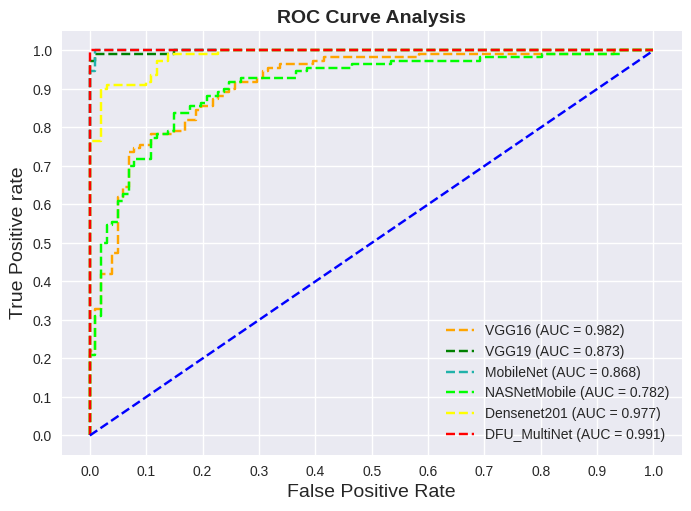

In [30]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='VGG16 (AUC = 0.982)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='VGG19 (AUC = 0.873)')
plt.plot(fpr3, tpr3, linestyle='--',color='LightSeaGreen', label='MobileNet (AUC = 0.868)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='NASNetMobile (AUC = 0.782)')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Densenet201 (AUC = 0.977)')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='DFU_MultiNet (AUC = 0.991)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve1',dpi=400)
plt.show();

<ipython-input-30-d6fea29abb75>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


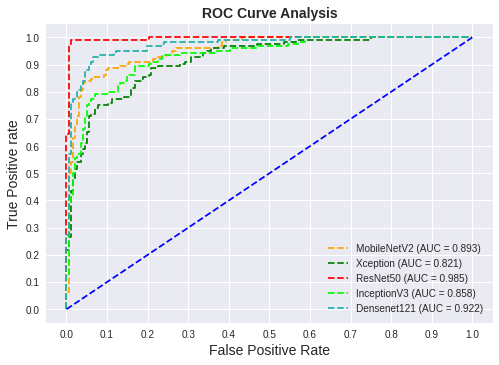

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='MobileNetV2 (AUC = 0.893)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xception (AUC = 0.821)')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='ResNet50 (AUC = 0.985)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='InceptionV3 (AUC = 0.858)')
plt.plot(fpr5, tpr5, linestyle='--',color='LightSeaGreen', label='Densenet121 (AUC = 0.922)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve12',dpi=400)
plt.show();

<ipython-input-31-e85adbe0718c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


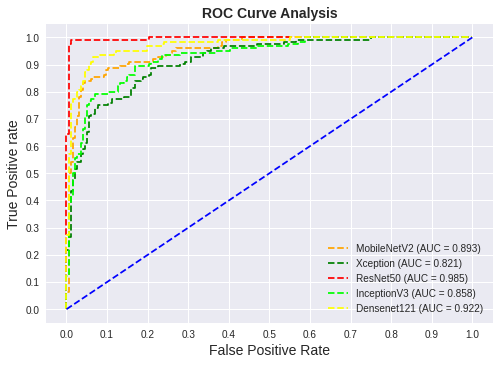

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='MobileNetV2 (AUC = 0.893)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xception (AUC = 0.821)')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='ResNet50 (AUC = 0.985)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='InceptionV3 (AUC = 0.858)')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Densenet121 (AUC = 0.922)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve13',dpi=400)
plt.show();